In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('~/Downloads/kakr-4th-competition/train.csv')
test = pd.read_csv('~/Downloads/kakr-4th-competition/test.csv')

In [3]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


In [4]:
print(test.info())
print('='*50)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              6512 non-null   int64 
 1   age             6512 non-null   int64 
 2   workclass       6512 non-null   object
 3   fnlwgt          6512 non-null   int64 
 4   education       6512 non-null   object
 5   education_num   6512 non-null   int64 
 6   marital_status  6512 non-null   object
 7   occupation      6512 non-null   object
 8   relationship    6512 non-null   object
 9   race            6512 non-null   object
 10  sex             6512 non-null   object
 11  capital_gain    6512 non-null   int64 
 12  capital_loss    6512 non-null   int64 
 13  hours_per_week  6512 non-null   int64 
 14  native_country  6512 non-null   object
dtypes: int64(7), object(8)
memory usage: 763.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (

In [5]:
train.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
test.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

## EDA 과정에서 살펴야 할것

1. EDA과정에서 봐야할 것
Feature 별 특성, 어떤 종류의 데이터를 어떻게 처리할까? 
모델에 직접 넣을 수 있는가? 
텍스트 정보를 인코딩하는 방법 고민 

-feature engineering 
missing value 를 대체할 방법 고민
이상치처리 / 일반화된 모델 도출의 어려움

-데이터 파악
수치형 (numerical) : 수 데이터
    - 이산형
    - 연속형
범주형 (categorical) : 수 외의 값
    - 명목형 : one-hot incoding
    - 순서형

기초 통계량 파악 (describe() function 사용)

In [7]:
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [8]:
test.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,6512.000000,6512.000000,6.512000e+03,6512.000000,6512.000000,6512.000000,6512.000000
mean,3255.500000,38.631296,1.876738e+05,10.049908,1037.483876,85.588145,40.414773
std,1879.996809,13.516418,1.038493e+05,2.593033,7371.453668,401.904741,12.290491
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,1627.750000,28.000000,1.165042e+05,9.000000,0.000000,0.000000,40.000000
50%,3255.500000,37.000000,1.768820e+05,10.000000,0.000000,0.000000,40.000000
75%,4883.250000,48.000000,2.358508e+05,12.000000,0.000000,0.000000,45.000000
max,6511.000000,90.000000,1.125613e+06,16.000000,99999.000000,4356.000000,99.000000


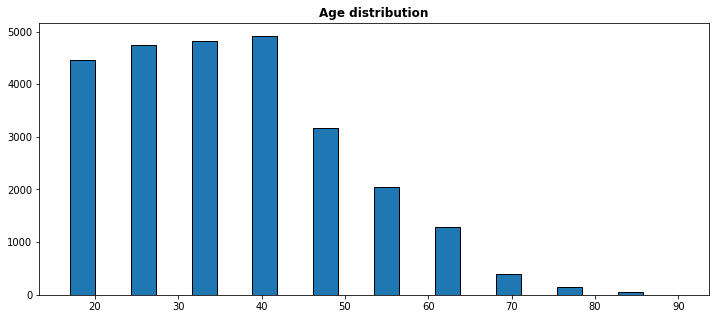

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(1,1, figsize=(12,5))
ax.hist(train['age'], width=3, edgecolor='black')
ax.set_title('Age distribution', fontweight='bold')

plt.show()

In [10]:
from inspect import signature

signature(plt.hist)

<Signature (x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)>

<AxesSubplot:xlabel='age', ylabel='Density'>

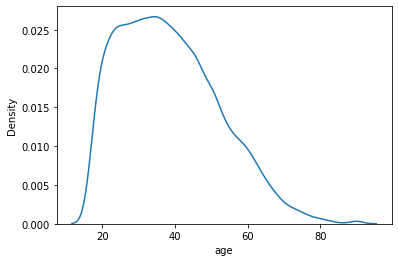

In [11]:
sns.kdeplot(data=train, x='age')

In [12]:
train['income'] = (train['income'] == '>50K').astype(int)
train['income'].value_counts()

0    19744
1     6305
Name: income, dtype: int64

In [13]:
train.groupby(['race', 'sex']).mean()

id        age         fnlwgt  \
race               sex                                              
Amer-Indian-Eskimo Female  12309.681818  37.454545  117238.954545   
                   Male    12441.331325  36.915663  125551.475904   
Asian-Pac-Islander Female  14562.177778  35.181481  146863.433333   
                   Male    12538.909434  38.884906  166262.398113   
Black              Female  12575.603774  37.939295  216797.705496   
                   Male    13192.518695  37.884646  243795.577566   
Other              Female  13165.047059  31.435294  173440.082353   
                   Male    11760.907563  34.789916  220238.193277   
White              Female  13036.291238  36.844026  184007.053584   
                   Male    13049.281506  39.589163  189231.912524   

                           education_num  capital_gain  capital_loss  \
race               sex                                                 
Amer-Indian-Eskimo Female       9.761364    646.636364     19.556818   
                   Male         9.090361    649.596386     53.662651   
Asian-Pac-Islander Female      10.325926    584.325926     61.122222   
                   Male        11.233962   2026.226415    135.403774   
Black              Female       9.525021    487.988515     40.462674   
                   Male         9.482896    579.319809     76.113763   
Other              Female       8.941176    236.129412     39.176471   
                   Male         8.907563   1799.764706     87.529412   
White              Female      10.127589    580.929761     63.601738   
                   Male        10.149254   1386.644906    103.084945   

                           hours_per_week    income  
race               sex                               
Amer-Indian-Eskimo Female       36.204545  0.102273  
                   Male         41.837349  0.120482  
Asian-Pac-Islander Female       37.407407  0.125926  
                   Male         42.037736  0.341509  
Black              Female       36.796555  0.051682  
                   Male         39.976134  0.190135  
Other              Female       36.670588  0.047059  
                   Male         41.403361  0.117647  
White              Female       36.209269  0.122085  
                   Male         42.687735  0.317846

In [17]:
train.groupby(['race', 'sex'])[['income']].mean().style.background_gradient(cmap='Purples')

In [20]:
pd.pivot_table(train,
              columns='sex',
              index='race',
              values='income',
              aggfunc='sum')

sex,Female,Male
race,,
Amer-Indian-Eskimo,9,20
Asian-Pac-Islander,34,181
Black,63,239
Other,4,14
White,843,4898


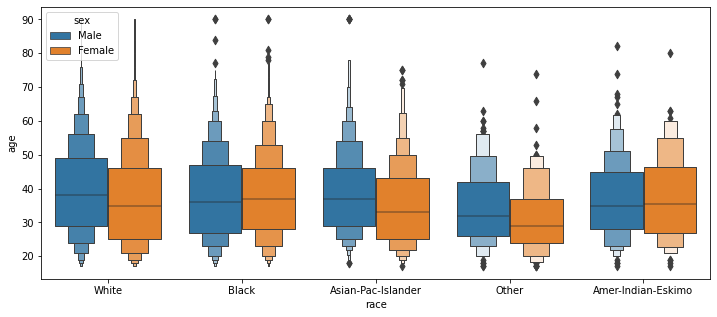

In [21]:
fig, ar = plt.subplots(1,1, figsize=(12,5))

sns.boxenplot(data=train, x='race', y='age', hue='sex')

plt.show()

In [22]:
signature(plt.boxplot)

<Signature (x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)>

<AxesSubplot:xlabel='race', ylabel='age'>

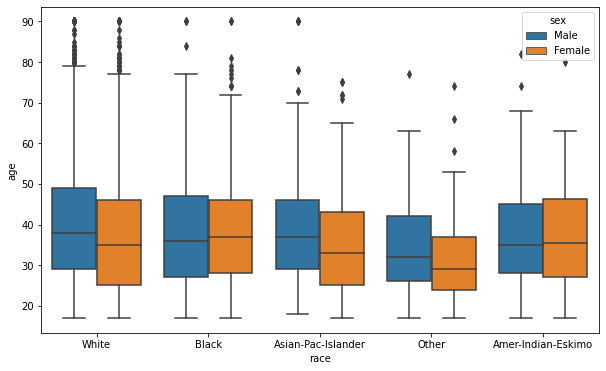

In [32]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))
sns.boxplot(data=train, x='race', y='age', hue='sex')

<AxesSubplot:xlabel='race', ylabel='hours_per_week'>

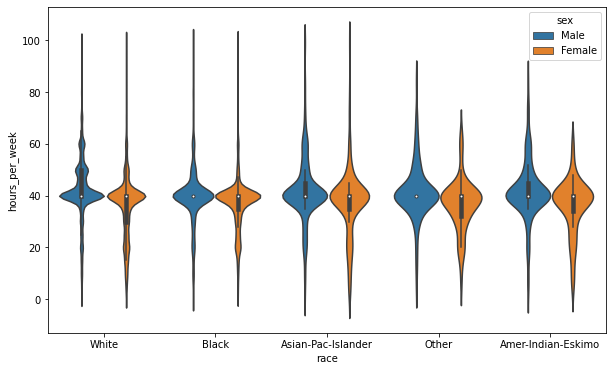

In [33]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))
sns.violinplot(data=train, x='race', y = 'hours_per_week')

In [37]:
# 상관계수 살피기 

# 피어슨 상관계수는 정상관여부로 살필 수 있음

train.corr().style.background_gradient(cmap='coolwarm')

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
id,1.000000,0.007866,-0.001191,0.002309,0.007228,-0.002553,0.005749,0.004350
age,0.007866,1.000000,-0.076618,0.040107,0.077768,0.057875,0.066038,0.229292
fnlwgt,-0.001191,-0.076618,1.000000,-0.046377,0.000953,-0.008689,-0.020064,-0.007500
education_num,0.002309,0.040107,-0.046377,1.000000,0.119382,0.074813,0.146063,0.334582
capital_gain,0.007228,0.077768,0.000953,0.119382,1.000000,-0.032030,0.080543,0.225296
capital_loss,-0.002553,0.057875,-0.008689,0.074813,-0.032030,1.000000,0.054957,0.152537
hours_per_week,0.005749,0.066038,-0.020064,0.146063,0.080543,0.054957,1.000000,0.233726
income,0.004350,0.229292,-0.007500,0.334582,0.225296,0.152537,0.233726,1.000000


<AxesSubplot:>

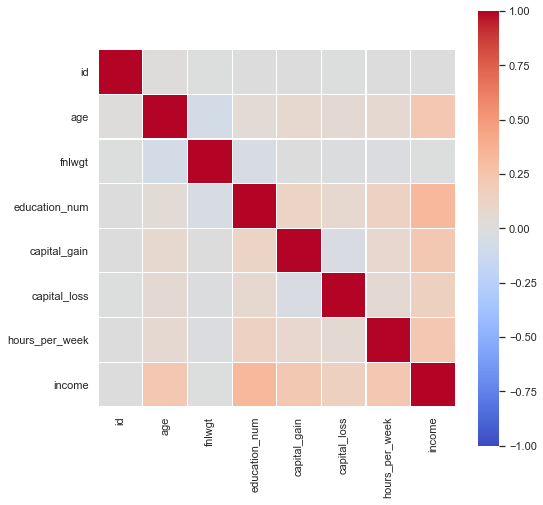

In [43]:
corr = train.corr()

fig, ax = plt.subplots(1,1, figsize=(8, 8))
sns.heatmap(corr, square=True, linewidths=.1, linecolor='white', 
            cmap='coolwarm', vmax=1.0, vmin=-1.0)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = train
flights = flights_long.pivot(train["race", "sex", "income"])

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

데이터별 관계 
train data와 test data 간의 분포 비교
데이터 간의 구성 / 관계 / 분포 살피기


## 모델에 적합한 input 형태로 만들기

x, y(target) 형태로 나누어 모델에 넣어야함. 

In [46]:
target = (train['income'] != '<=50K').astype(int)

/Users/lucia/.pyenv/versions/3.6.1/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


In [48]:
train.drop(['income'], axis=1, inplace=True)

KeyError: "['income'] not found in axis"

In [50]:
target

0        1
1        1
2        1
3        1
4        1
        ..
26044    1
26045    1
26046    1
26047    1
26048    1
Name: income, Length: 26049, dtype: int64